In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import *

In [3]:
truth_X, truth_S, sig_hists_LR_noSH, bkg_hists_LR_noSH, ratio_Xbb_LR_noSH, ratio_2b_LR_noSH = prepare_hist_allYears(trig='LR', X_SH=False)


Preparing histograms for 2018...
Getting signals from /data/rainbolt/sh4b/fixed_sh4b_selection/signal
for 2018 , mc20e , with trigger LR
Getting background for 2018 with trigger LR  and btag Xbb
bkg_total [{run_number: 348885, lumi_block: 226, event_number: 101091623, ...}, ...]
Transfer factor high  :  0.007548279580433291
Transfer factor low   :  0.00930824008138352
Transfer factor total :  0.008411961459737407
Transfer factor mean  :  0.008428259830908405
Number events         :  24296
Getting background for 2018 with trigger LR  and btag 2b
bkg_total [{run_number: 349533, lumi_block: 187, event_number: 563292845, ...}, ...]
Transfer factor high  :  0.06142800159553251
Transfer factor low   :  0.08840579710144927
Transfer factor total :  0.07362901463840944
Transfer factor mean  :  0.07491689934849088
Number events         :  2685
Getting background for 2018 with trigger LR  and btag pass
bkg_total [{run_number: 349526, lumi_block: 150, event_number: 382457601, ...}, ...]
Plots will

In [4]:
truth_X, truth_S, sig_hists_OR_noSH, bkg_hists_OR_noSH, ratio_Xbb_OR_noSH, ratio_2b_OR_noSH = prepare_hist_allYears(trig='OR', X_SH=False)


Preparing histograms for 2018...
Getting signals from /data/rainbolt/sh4b/fixed_sh4b_selection/signal
for 2018 , mc20e , with trigger OR
Getting background for 2018 with trigger OR  and btag Xbb
bkg_total [{run_number: 348885, lumi_block: 217, event_number: 93596263, ...}, ..., {...}]
Transfer factor high  :  0.006091109935588263
Transfer factor low   :  0.0071605602413110725
Transfer factor total :  0.006806964117152315
Transfer factor mean  :  0.006625835088449668
Number events         :  530165
Getting background for 2018 with trigger OR  and btag 2b
bkg_total [{run_number: 348885, lumi_block: 227, event_number: 103158746, ...}, ...]
Transfer factor high  :  0.03959945380063723
Transfer factor low   :  0.052319786621744926
Transfer factor total :  0.047778951264205956
Transfer factor mean  :  0.04595962021119108
Number events         :  78084
Getting background for 2018 with trigger OR  and btag pass
bkg_total [{run_number: 348885, lumi_block: 408, event_number: 334565599, ...}, ...

In [5]:
from fitter import Fitter

def run_fit(truth_S, truth_X, sig_hists, bkg_hists, ratio_Xbb, ratio_2b, name='', quick=False):
    exp_limits = []

    for S in truth_S:

        exp_limits_s = []

        for X in truth_X:

            key = f'{X}_{S}'
            
            # print(key)

            sig = sig_hists.get(key, None)
            bkg = bkg_hists.get(key, None)
            ratio_Xbb_ = ratio_Xbb.get(key, None)
            ratio_2b_ = ratio_2b.get(key, None)

            if sig is None:
                # print('-> Signal is None')
                exp_limits_s.append(np.inf)
                continue
                
            # print(S, X)
            if (S not in [400, 500] or X not in [2000]) and quick:
            # if (S not in [500] or X not in [1500]) and quick:
                # print('->')
                exp_limits_s.append(np.inf)
                continue

            print(f'Fitting X = {X}, S = {S}')

            bins = sig[1]
            
            sig     = ak.to_numpy(sig[0])
            bkg     = ak.to_numpy(bkg[0])
            ratio_Xbb_ = ak.to_numpy(ratio_Xbb_)
            ratio_2b_ = ak.to_numpy(ratio_2b_)

            fitter = Fitter(sig, bkg, bins, X, S, debug=False, save_dir=f'plots_fit_{name}/')
            
            fitter.set_bkg_vars(bkg * ratio_Xbb_, bkg * ratio_2b_)
        
            fitter.prepare_fit(plot_summary=True)

            obs_limit, exp_limit = fitter.fit(poi_values=np.linspace(0.01, 350, 500))

            exp_limits_s.append(float(exp_limit))

        exp_limits.append(exp_limits_s)
    return exp_limits

In [6]:
exp_limits_OR_noSH = run_fit(truth_S, truth_X, sig_hists_OR_noSH, bkg_hists_OR_noSH, ratio_Xbb_OR_noSH, ratio_2b_OR_noSH, name='OR_noXSH', quick=False)


Fitting X = 200, S = 70
Fitting X = 300, S = 70
Fitting X = 400, S = 70
Fitting X = 750, S = 70
Fitting X = 1000, S = 70
Fitting X = 1500, S = 70
Fitting X = 2000, S = 70
Fitting X = 2500, S = 70
Fitting X = 3000, S = 70
Fitting X = 300, S = 100
Fitting X = 400, S = 100
Fitting X = 750, S = 100
Fitting X = 1000, S = 100
Fitting X = 1500, S = 100
Fitting X = 2000, S = 100
Fitting X = 2500, S = 100
Fitting X = 3000, S = 100
Fitting X = 4000, S = 100
Fitting X = 5000, S = 100
Fitting X = 6000, S = 100
Fitting X = 300, S = 170
Fitting X = 400, S = 170
Fitting X = 750, S = 170
Fitting X = 1000, S = 170
Fitting X = 1500, S = 170
Fitting X = 2000, S = 170
Fitting X = 2500, S = 170
Fitting X = 3000, S = 170
Fitting X = 400, S = 200
Fitting X = 750, S = 200
Fitting X = 1000, S = 200
Fitting X = 1500, S = 200
Fitting X = 2000, S = 200
Fitting X = 2500, S = 200
Fitting X = 3000, S = 200
Fitting X = 4000, S = 200
Fitting X = 5000, S = 200
Fitting X = 6000, S = 200
Fitting X = 400, S = 250
Fitting 

In [7]:
exp_limits_LR_noSH = run_fit(truth_S, truth_X, sig_hists_LR_noSH, bkg_hists_LR_noSH, ratio_Xbb_LR_noSH, ratio_2b_LR_noSH, name='LR_noXSH', quick=False)
# exp_limits_OR_noSH = run_fit(truth_S, truth_X, sig_hists_OR_noSH, bkg_hists_OR_noSH, ratio_Xbb_OR_noSH, ratio_2b_OR_noSH, name='OR_noXSH', quick=False)
# exp_limits_LR_noSH_inverted = run_fit(truth_S, truth_X, sig_hists_LR_noSH, bkg_hists_LR_noSH, ratio_2b_LR_noSH, ratio_Xbb_LR_noSH, name='LR_noXSH_inverted', quick=False)


Fitting X = 200, S = 70
Fitting X = 300, S = 70
Fitting X = 400, S = 70
Fitting X = 750, S = 70
Fitting X = 1000, S = 70
Fitting X = 1500, S = 70
Fitting X = 2000, S = 70
Fitting X = 2500, S = 70
Fitting X = 3000, S = 70
Fitting X = 300, S = 100
Fitting X = 400, S = 100
Fitting X = 750, S = 100
Fitting X = 1000, S = 100
Fitting X = 1500, S = 100
Fitting X = 2000, S = 100
Fitting X = 2500, S = 100
Fitting X = 3000, S = 100
Fitting X = 4000, S = 100
Fitting X = 5000, S = 100
Fitting X = 6000, S = 100
Fitting X = 300, S = 170
Fitting X = 400, S = 170
Fitting X = 750, S = 170
Fitting X = 1000, S = 170
Fitting X = 1500, S = 170
Fitting X = 2000, S = 170
Fitting X = 2500, S = 170
Fitting X = 3000, S = 170
Fitting X = 400, S = 200
Fitting X = 750, S = 200
Fitting X = 1000, S = 200
Fitting X = 1500, S = 200
Fitting X = 2000, S = 200
Fitting X = 2500, S = 200
Fitting X = 3000, S = 200
Fitting X = 4000, S = 200
Fitting X = 5000, S = 200
Fitting X = 6000, S = 200
Fitting X = 400, S = 250
Fitting 

In [8]:
labels_x = []
labels_s = []
for x in sorted(set(truth_X)):
    labels_x.append(str(x))
for s in sorted(set(truth_S)):
    labels_s.append(str(s))


In [9]:
from plotting_tools import annotate_heatmap
from matplotlib.colors import LogNorm

labels_x = []
labels_s = []
for x in sorted(set(truth_X)):
    labels_x.append(str(x))
for s in sorted(set(truth_S)):
    labels_s.append(str(s))
        
def plot_limits(exp_limits,
                name='',
                title='',
                cbar_label='95% CL Upper Limit on Cross Section [fb]',
                cmap='Blues',
                color_threshold=0.5,
                comparison=False):
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))

    if not comparison:
        im = ax.imshow(exp_limits, cmap=cmap, norm=LogNorm(vmin=0.1, vmax=350))
    else:
        im = ax.imshow(exp_limits, cmap=cmap, vmin=-100, vmax=100)

    texts = annotate_heatmap(im, data=None, valfmt="{x:.1f}", threshold=color_threshold,
                             fontsize=9, ha="center", va="center")

    cbar = ax.figure.colorbar(im)
    cbar.ax.set_ylabel("", rotation=-90, va="bottom")
    cbar.set_label(cbar_label, rotation=90, size=15, labelpad=15)

    #Show all ticks and label them with the respective list entries

    ax.set_xticks(np.arange(len(labels_x)), labels=labels_x)
    ax.set_yticks(np.arange(len(labels_s)), labels=labels_s)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_xlabel('$m_{X}$ [GeV]', fontsize=18)
    ax.set_ylabel('$m_{S}$ [GeV]', fontsize=18)
    ax.set_title(title, fontsize=14, loc='right')

    fig.tight_layout()
    print("Saving... plots_fit" +"/"+  "Limits_" + name + '.pdf')
    plt.savefig("plots_fit" +"/"+  "Limits_" + name + '.pdf')
    plt.show()


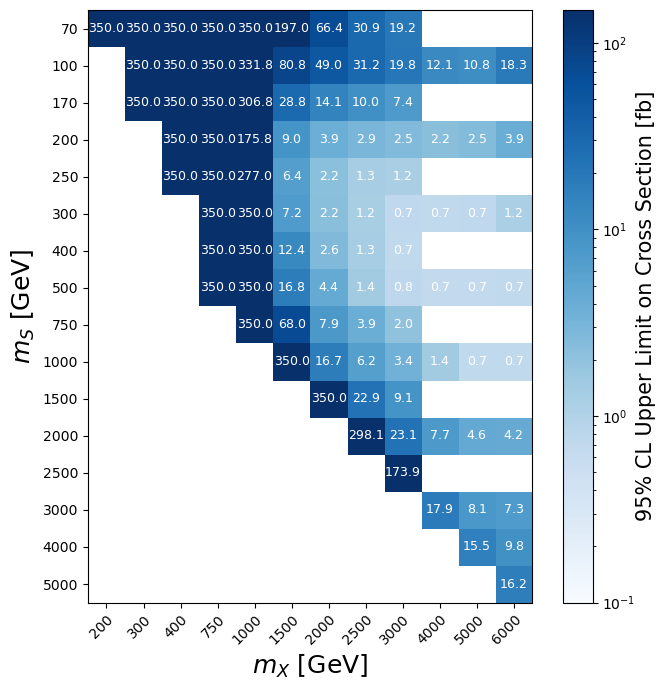

In [22]:
exp_limits_LR_noSH = np.array(exp_limits_LR_noSH)
plot_limits(exp_limits_LR_noSH, name='LR_noXSH_Aug6')


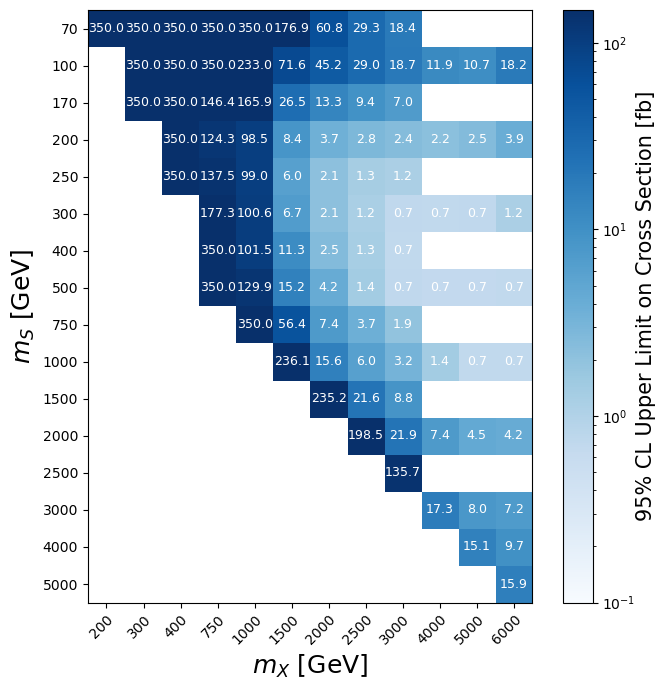

In [23]:
exp_limits_OR_noSH = np.array(exp_limits_OR_noSH)
plot_limits(exp_limits_OR_noSH, name='OR_noXSH_Aug6')

In [24]:
exp_limits_LR_noSH_inverted = np.array(exp_limits_LR_noSH_inverted)
plot_limits(exp_limits_LR_noSH_inverted, name='LR_noXSH_inverted_Aug6')

NameError: name 'exp_limits_LR_noSH_inverted' is not defined

In [25]:
from plotting_tools import annotate_heatmap
from matplotlib.colors import LogNorm

labels_x = []
labels_s = []
for x in sorted(set(truth_X)):
    labels_x.append(str(x))
for s in sorted(set(truth_S)):
    labels_s.append(str(s))
        
def plot_limits(exp_limits,
                name='',
                title='',
                cbar_label='95% CL Upper Limit on Cross Section [fb]',
                cmap='Blues',
                color_threshold=0.5,
                comparison=False):
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))

    if not comparison:
        im = ax.imshow(exp_limits, cmap=cmap, norm=LogNorm(vmin=0.1, vmax=150))
    else:
        im = ax.imshow(exp_limits, cmap=cmap, vmin=-100, vmax=100)

    texts = annotate_heatmap(im, data=None, valfmt="{x:.1f}", threshold=color_threshold,
                             fontsize=9, ha="center", va="center")

    cbar = ax.figure.colorbar(im)
    cbar.ax.set_ylabel("", rotation=-90, va="bottom")
    cbar.set_label(cbar_label, rotation=90, size=15, labelpad=15)

    #Show all ticks and label them with the respective list entries

    ax.set_xticks(np.arange(len(labels_x)), labels=labels_x)
    ax.set_yticks(np.arange(len(labels_s)), labels=labels_s)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_xlabel('$m_{X}$ [GeV]', fontsize=18)
    ax.set_ylabel('$m_{S}$ [GeV]', fontsize=18)
    ax.set_title(title, fontsize=14, loc='right')

    fig.tight_layout()
    plt.savefig("plots_fit" +"/"+  "Limits_" + name + '_Aug6.pdf')
    plt.show()


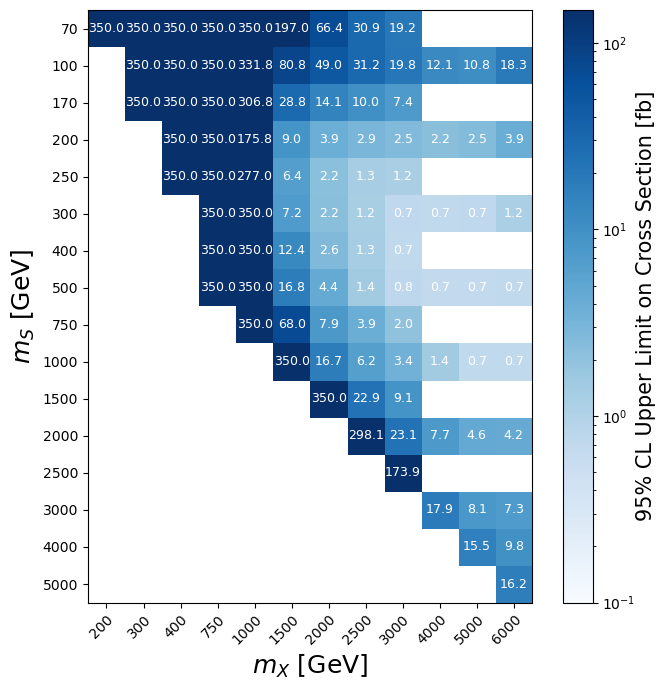

In [26]:
exp_limits_LR_noXSH = np.array(exp_limits_LR_noSH)
plot_limits(exp_limits_LR_noXSH, name='LR_noXSH')


In [ ]:
exp_limits_OR_noXSH = np.array(exp_limits_OR_noXSH)
plot_limits(exp_limits_OR_noXSH, name='OR_noXSH')

NameError: name 'exp_limits_OR_noXSH' is not defined

/tmp/ipykernel_706/1755881575.py:1: RuntimeWarning: invalid value encountered in subtract
  perc_diff = (exp_limits_OR_noSH - exp_limits_LR_noSH) / exp_limits_LR_noSH * 100


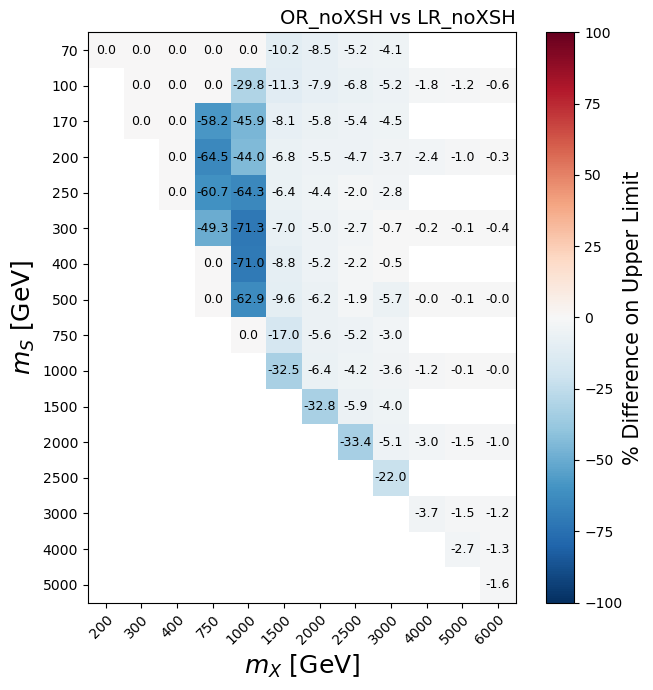

In [28]:
perc_diff = (exp_limits_OR_noSH - exp_limits_LR_noSH) / exp_limits_LR_noSH * 100
plot_limits(perc_diff, name='OR_noXSH_perc_diff',
            title='OR_noXSH vs LR_noXSH',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)


In [ ]:
exp_limits_LR_XSH = np.array(exp_limits_LR_XSH)
exp_limits_OR_XSH = np.array(exp_limits_OR_XSH)
exp_limits_LR_noXSH = np.array(exp_limits_LR_noXSH)
exp_limits_OR_noXSH = np.array(exp_limits_OR_noXSH)

In [ ]:
plot_limits(exp_limits_LR_XSH, name='LR_XSH')
plot_limits(exp_limits_OR_XSH, name='OR_XSH')
plot_limits(exp_limits_LR_noXSH, name='LR_noXSH')
plot_limits(exp_limits_OR_noXSH, name='OR_noXSH')

In [ ]:
perc_diff = (exp_limits_OR_XSH - exp_limits_LR_XSH) / exp_limits_LR_XSH * 100
plot_limits(perc_diff, name='OR_XSH_perc_diff',
            title='OR_XSH vs LR_XSH',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)

perc_diff = (exp_limits_LR_noXSH - exp_limits_LR_XSH) / exp_limits_LR_XSH * 100
plot_limits(perc_diff, name='LR_noXSH_perc_diff',
            title='LR_noXSH vs LR_XSH',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)

perc_diff = (exp_limits_OR_noXSH - exp_limits_LR_XSH) / exp_limits_LR_XSH * 100
plot_limits(perc_diff, name='OR_noXSH_perc_diff',
            title='OR_noXSH vs LR_XSH',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)

In [ ]:
jackson = [
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], # 70
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], # 100
[0., 0., 0., 42.8, 14.8, 5.4, 4.2, 4.2, 5.2, 0., 0., 0.], # 170
[0., 0., 0., 62.4, 18.8, 5.1, 2.9, 2.7, 3.0, 4.7, 10.5, 0.], # 200
[0., 0., 0., 88.1, 40.1, 6.5, 3.8, 2.0, 2.0, 0., 0., 0.], # 250
[0., 0., 0., 67.3, 23.6, 8.2, 3.5, 2.0, 1.5, 1.9, 4.0, 0.], # 300
[0., 0., 0., 101.1, 15.3, 4.1, 2.4, 1.7, 1.0, 0., 0., 0.], # 400
[0., 0., 0., 2159.8, 22.7, 4.2, 1.9, 1.3, 1.1, 0.7, 1.0, 0.], # 500
[0., 0., 0., 0., 4994.0, 9.4, 2.2, 1.0, 0.7, 0., 0., 0.], # 750
[0., 0., 0., 0., 0., 32.5, 3.6, 1.5, 0.8, 0.5, 0.8, 0.], # 1000
[0., 0., 0., 0., 0., 0., 51.6, 4.8, 1.6, 0., 0., 0.], # 1500
[0., 0., 0., 0., 0., 0., 0., 53.4, 6.7, 1.3, 1.0, 0.], # 2000
[0., 0., 0., 0., 0., 0., 0., 0., 88.6, 0., 0., 0.], # 2500
[0., 0., 0., 0., 0., 0., 0., 0., 0., 14.2, 3.3, 0.], # 3000
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 31.0, 0.], # 4000
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], # 5000
]

jackson = np.array(jackson)

perc_diff = (jackson - exp_limits_OR_XSH) / exp_limits_OR_XSH * 100
plot_limits(perc_diff, name='jackson_perc_diff',
            title='NF OR_XSH vs OR_XSH',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)